>> ## Quantitative analysis for APPL

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/yfinance_data/AAPL_historical_data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0


>>> ##### Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [4]:
from scripts.edaAndQuantitativeAnalysis import validate_columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
validate_columns(data, required_columns)  

All required columns are present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


>>> #####  Handle missing values

In [6]:
from scripts.edaAndQuantitativeAnalysis import handle_missing_values

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


>>> ##### Analyze statistics

In [7]:
from scripts.edaAndQuantitativeAnalysis import analyze_statistics
  
analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

               Open          High           Low     Adj Close         Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     21.494496     22.312754   
std       46.003685     46.496031     45.540929     45.561916     46.037660   
min        0.049665      0.049665      0.049107      0.037857      0.049107   
25%        0.299107      0.303710      0.290179      0.241840      0.298549   
50%        0.531250      0.537946      0.522321      0.432079      0.531250   
75%       20.204196     20.389554     19.998036     17.253029     20.196160   
max      236.479996    237.229996    233.089996    234.548523    234.820007   

             Volume  
count  1.099800e+04  
mean   3.180806e+08  
std    3.354523e+08  
min    0.000000e+00  
25%    1.132545e+08  
50%    2.057412e+08  
75%    3.985275e+08  
max    7.421641e+09  


>>> ##### visualize distribution 

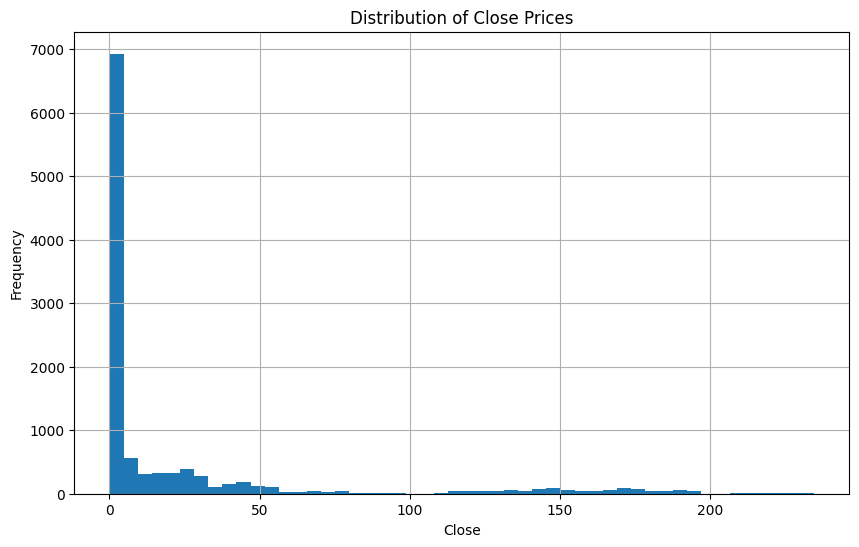

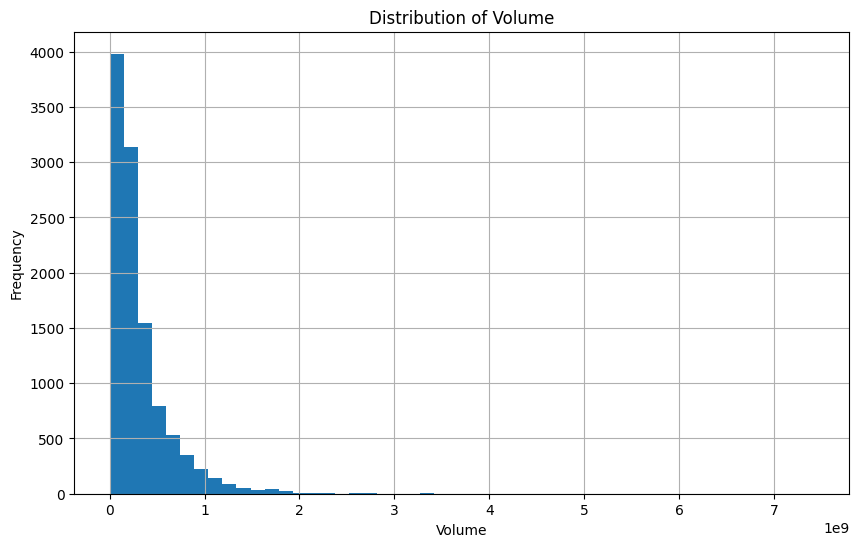

In [8]:
from scripts.edaAndQuantitativeAnalysis import plot_distributions
plot_distributions(data, 'Close', title="Distribution of Close Prices")
plot_distributions(data, 'Volume', title="Distribution of Volume")

>>> ##### Analyze correlation


Correlation Matrix:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999945  0.999941   0.999667  0.999873 -0.254604
High       0.999945  1.000000  0.999925   0.999734  0.999941 -0.254235
Low        0.999941  0.999925  1.000000   0.999743  0.999942 -0.255200
Adj Close  0.999667  0.999734  0.999743   1.000000  0.999796 -0.256273
Close      0.999873  0.999941  0.999942   0.999796  1.000000 -0.254733
Volume    -0.254604 -0.254235 -0.255200  -0.256273 -0.254733  1.000000


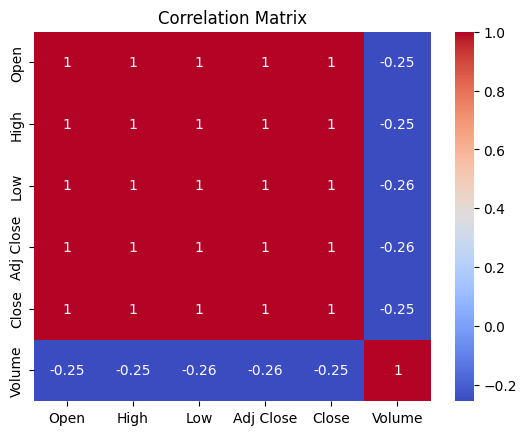

In [9]:
from scripts.edaAndQuantitativeAnalysis import analyze_correlations
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

>>> ##### study volatility

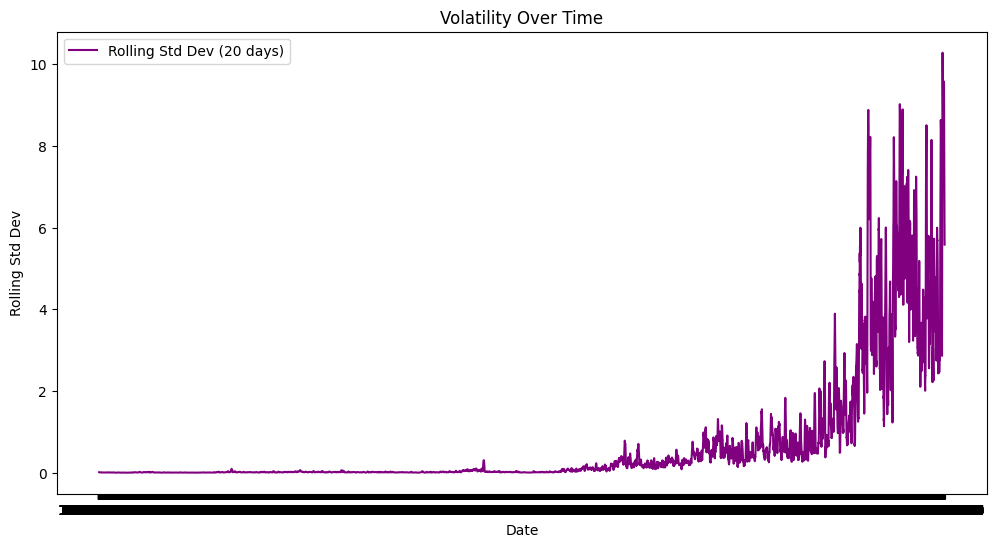

In [10]:
from scripts.edaAndQuantitativeAnalysis import plot_volatility
plot_volatility(data, 'Close', 'Date')

>> # Quantitative Analysis

>>> #### Calculate indicators

In [11]:
from scripts.edaAndQuantitativeAnalysis import calculate_indicators
data = calculate_indicators(data)

In [12]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Rolling_Std,SMA_20,RSI,MACD,MACD_signal,MACD_hist
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


>>> #### Calculate financial metrics

In [13]:
from scripts.edaAndQuantitativeAnalysis import calculate_financial_metrics
data = calculate_financial_metrics(data)

In [14]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Rolling_Std,SMA_20,RSI,MACD,MACD_signal,MACD_hist,Daily_Return,Cumulative_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.053581,0.946419
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.076231,0.874273
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.024450,0.895648
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.028580,0.921246
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.059239,0.975820
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.047522,1.022193
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.041333,1.064443
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.051290,1.119038
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.088294,1.217842


>>> ### Visualization

>>>> #### plot_stock_and_sma(data)

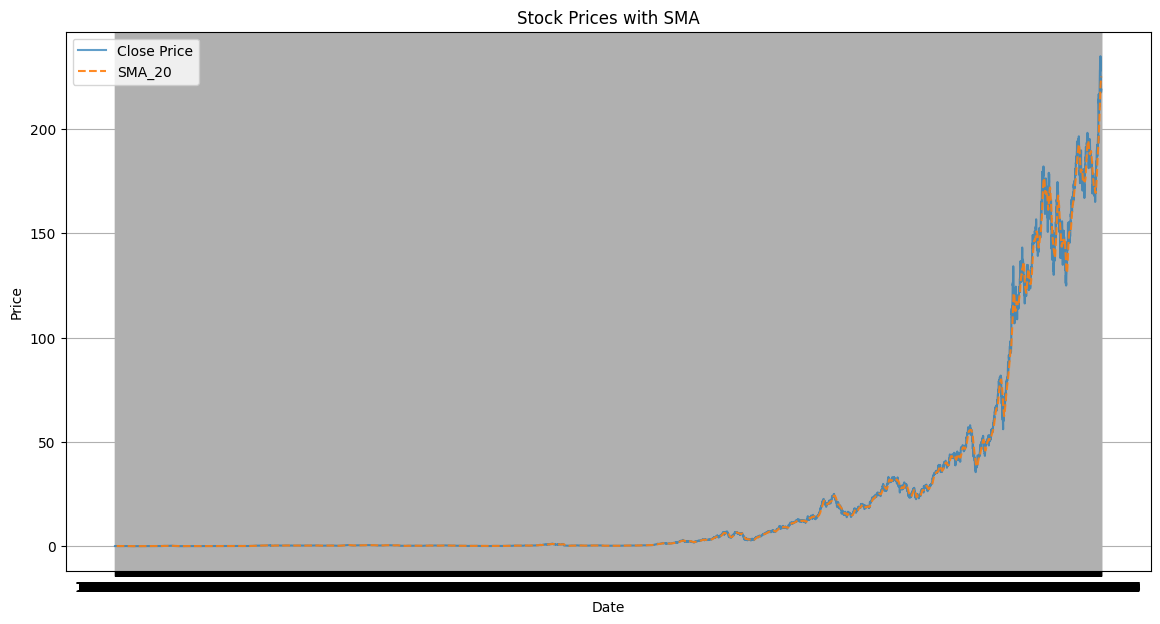

In [15]:
from scripts.edaAndQuantitativeAnalysis import plot_stock_and_sma
plot_stock_and_sma(data)

>>>>#### plot_rsi(data)

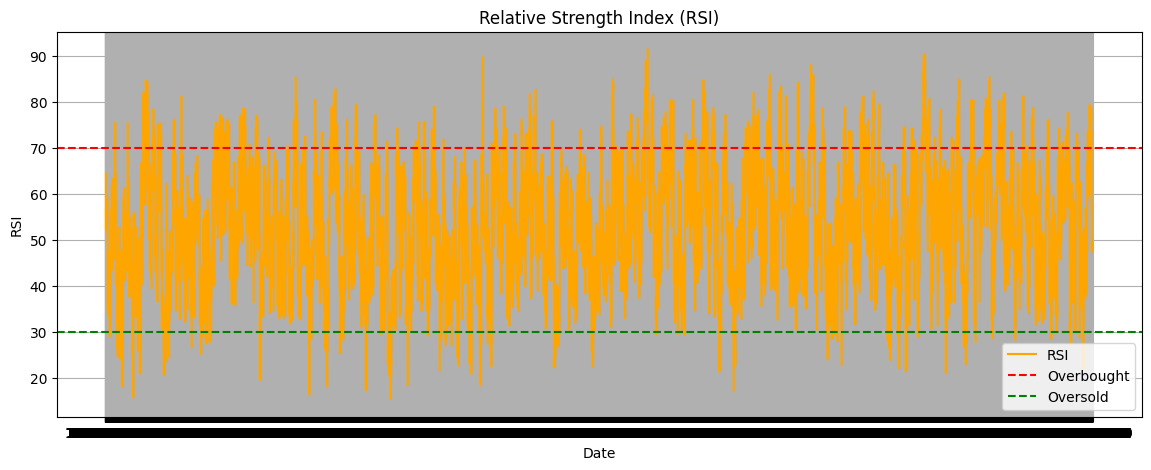

In [16]:
from scripts.edaAndQuantitativeAnalysis import plot_rsi
plot_rsi(data)

>>>> #### plot_macd(data)

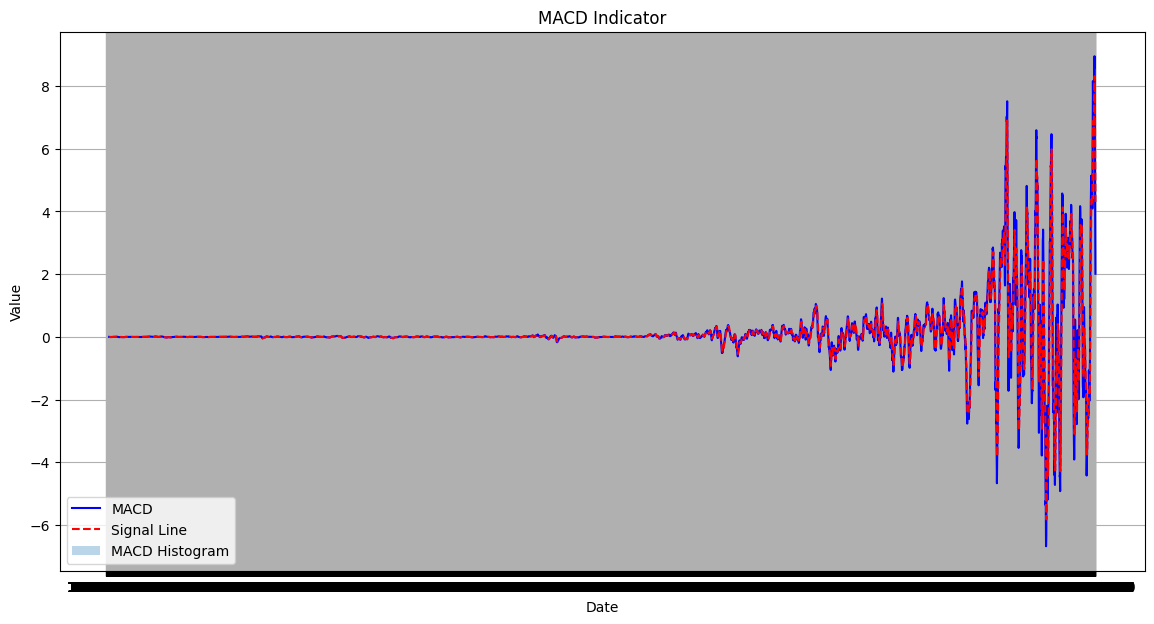

In [17]:
from scripts.edaAndQuantitativeAnalysis import plot_macd
plot_macd(data)

>>>> #### plot_financial_metrics(data)

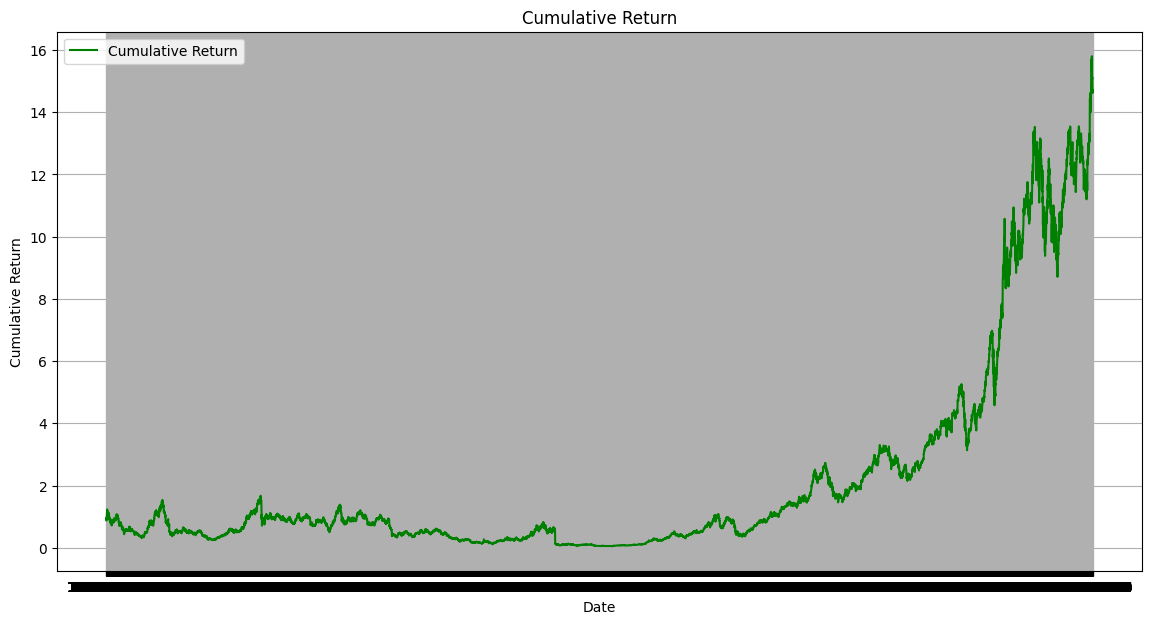

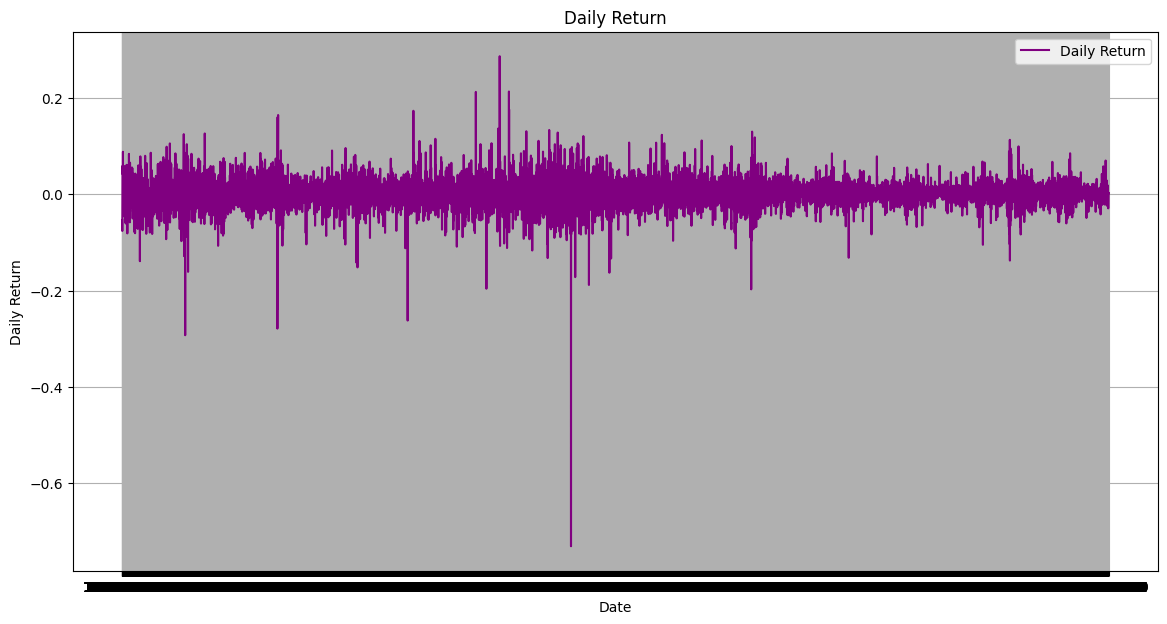

In [18]:
from scripts.edaAndQuantitativeAnalysis import plot_financial_metrics
plot_financial_metrics(data)